<a href="https://colab.research.google.com/github/brittanyasare04/clustering_assignment/blob/main/assignment_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [2]:
# Cloning the repository
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 4.93 MiB/s, done.


In [3]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

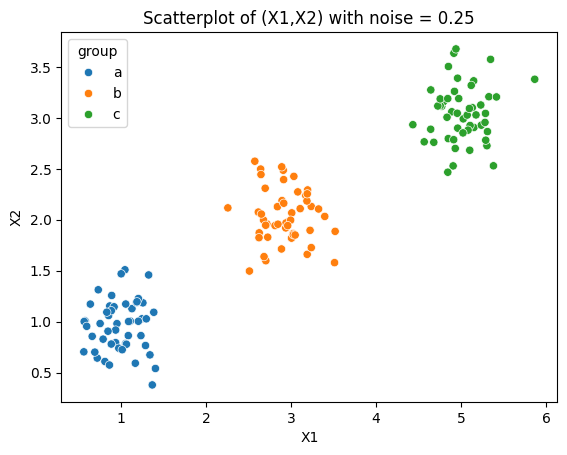

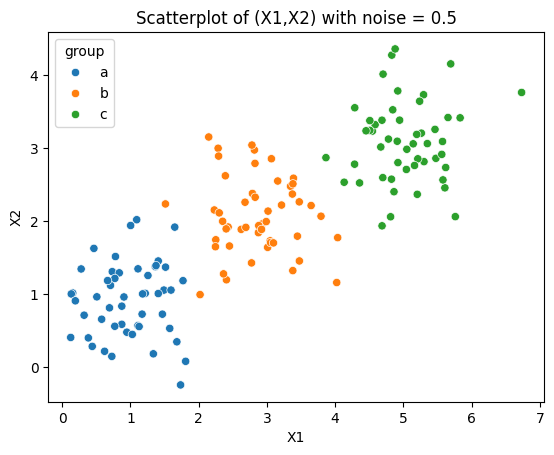

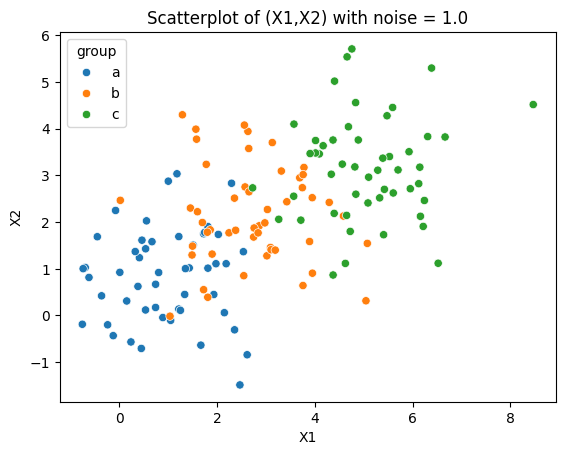

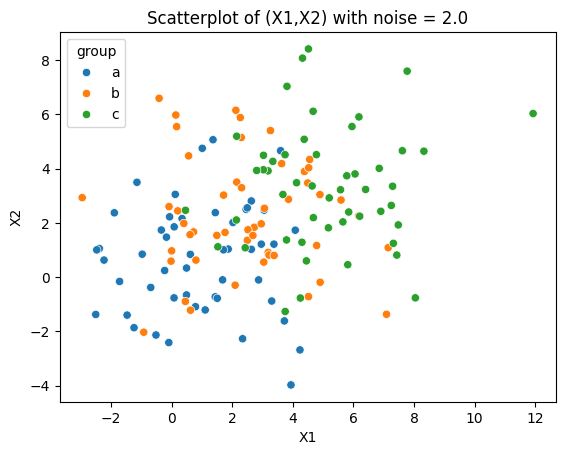

In [8]:
# Creating scatterpolts for each dataset by noise level
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of (X1,X2) with noise = 0.25')
plt.show()

sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of (X1,X2) with noise = 0.5')
plt.show()

sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of (X1,X2) with noise = 1.0')
plt.show()

sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatterplot of (X1,X2) with noise = 2.0')
plt.show()

As the the noise goes up, we can see that the visual distinction of the plots on the graph being to no longer show clustering, but rather dispersement of the points.

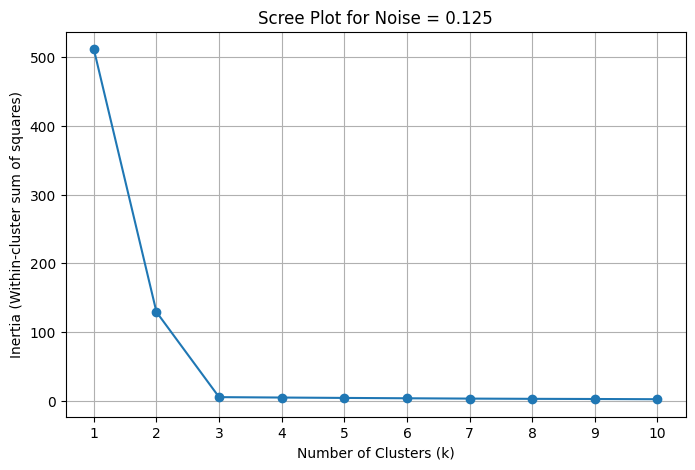

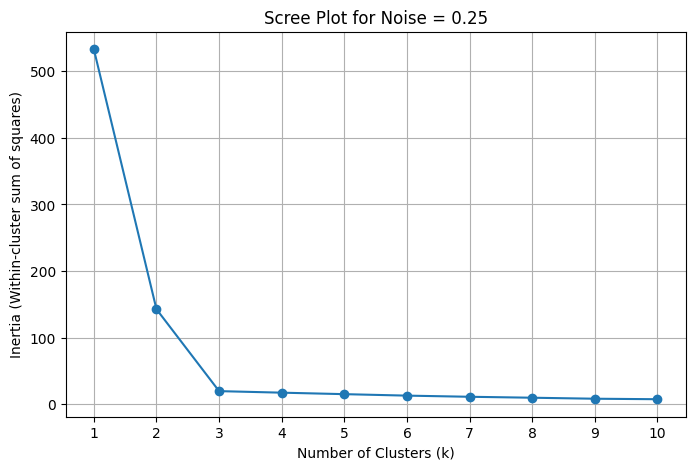

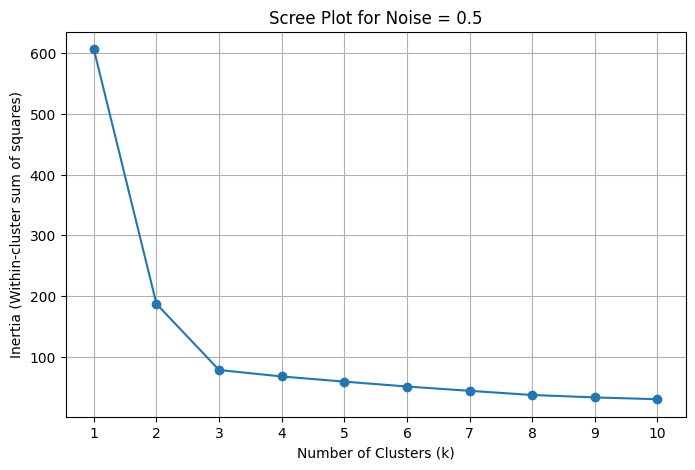

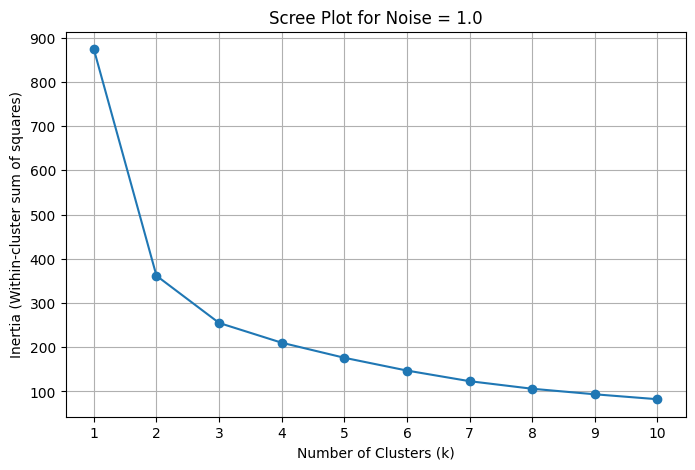

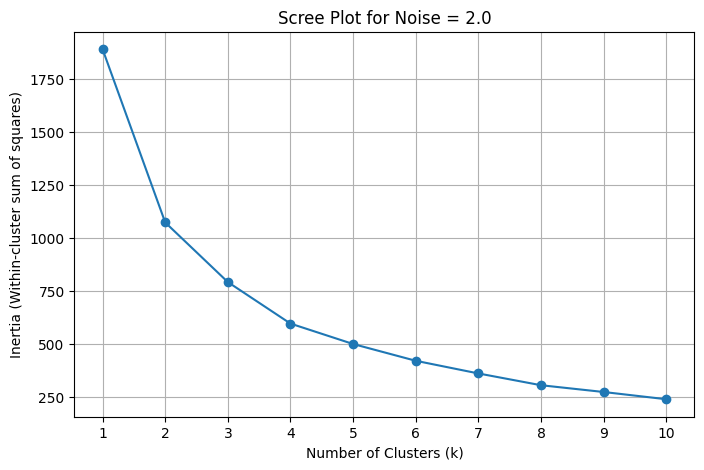

In [10]:
#Creating scree plots based on the data
from sklearn.cluster import KMeans

def create_scree_plot(df, title):
    X = df[['x1', 'x2']]
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.title(f'Scree Plot for {title}')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

create_scree_plot(df0_125, 'Noise = 0.125')
create_scree_plot(df0_25, 'Noise = 0.25')
create_scree_plot(df0_5, 'Noise = 0.5')
create_scree_plot(df1_0, 'Noise = 1.0')
create_scree_plot(df2_0, 'Noise = 2.0')

In the graphs with lower levels of noise, we can see there being a distinct elbow with the k=3. As we increase the noise, the elbow then becomes less distinct while k=3. Lastly, we see the noise increased the most, the elbow is not prominant anf the k value begins to shift.

The elbow method is based on the idea where the number of clusters increase, the inerita decreases. In the example we created, we can see that with low noise, the data was more clearly defined in clusters. When k increases, the inertia drops which captures the true cluster structure, creating that elbow. As the noise increases, the clusers become less distinct and begins to overlap. This would mean as the inertia decreases as you increase k. This is how the elbow becomes less pronounce.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [11]:
# Loading the 2022 election cycle fundraising.csv file
df = pd.read_csv('./clustering_assignment/data/2022 election cycle fundraising.csv')

In [12]:
def clean_currency(s):
    if isinstance(s, str):
        return float(s.replace('$', '').replace(',', ''))
    return float(s)

for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:
    df[col] = df[col].apply(clean_currency)

display(df.head())
display(df.info())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         537 non-null    int64  
 1   Member        537 non-null    object 
 2   Party         537 non-null    object 
 3   State         537 non-null    object 
 4   Chamber       537 non-null    object 
 5   Raised        537 non-null    float64
 6   Spent         537 non-null    float64
 7   Cash on Hand  537 non-null    float64
 8   Debts         537 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 37.9+ KB


None

I cleaned this data that originially included dollar signs and commas by removing them from the data making them no longer a string, but rather as a numeric value in all the variables.


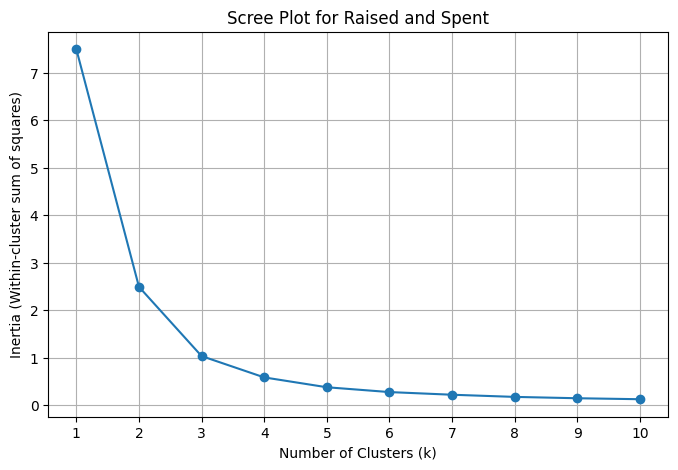

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Max-min normalize 'Raised' and 'Spent'
scaler = MinMaxScaler()
df[['Raised_normalized', 'Spent_normalized']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Create a scree plot for the normalized data
X_raised_spent = df[['Raised_normalized', 'Spent_normalized']]
inertia_raised_spent = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_raised_spent)
    inertia_raised_spent.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_raised_spent, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Scree Plot for Raised and Spent')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

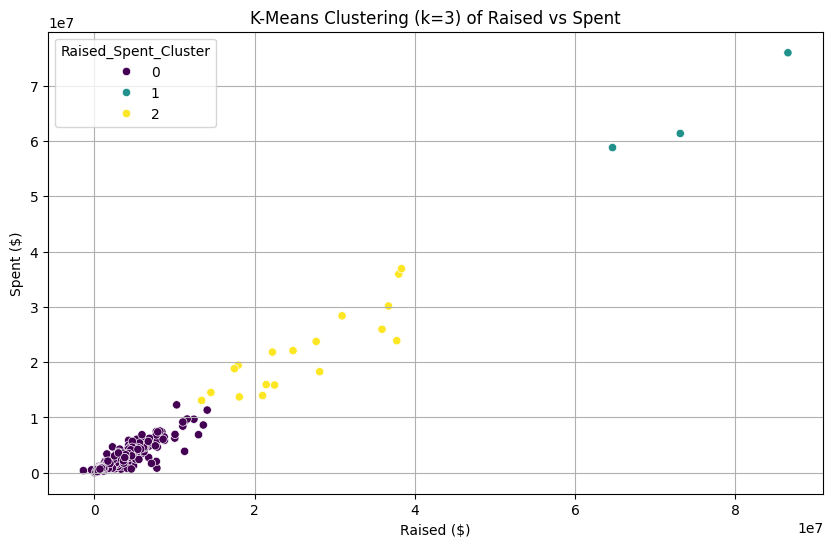

The two smallest clusters for Raised and Spent are: [1, 2]


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_Spent_Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,2
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1876149.0,0.0,2
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,2
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,15762568.0,0.0,2
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,7507326.0,0.0,2
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,4813508.0,0.0,2
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,9631856.0,0.0,2
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,1


In [14]:
# Perform K-Means clustering with k=3
kmeans_raised_spent = KMeans(n_clusters=3, random_state=100, n_init=10)
df['Raised_Spent_Cluster'] = kmeans_raised_spent.fit_predict(X_raised_spent)

# Create a scatter plot of Raised against Spent, hue by cluster membership
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Raised_Spent_Cluster', palette='viridis', legend='full')
plt.xlabel('Raised ($)')
plt.ylabel('Spent ($)')
plt.title('K-Means Clustering (k=3) of Raised vs Spent')
plt.grid(True)
plt.show()

# Identify the two smallest clusters
cluster_counts = df['Raised_Spent_Cluster'].value_counts().sort_values()
smallest_clusters = cluster_counts.head(2).index.tolist()

print(f"The two smallest clusters for Raised and Spent are: {smallest_clusters}")

# Get the members of the smallest two clusters
members_smallest_clusters = df[df['Raised_Spent_Cluster'].isin(smallest_clusters)][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Raised_Spent_Cluster']]

display(members_smallest_clusters)

Members of the two smallest clusters consists of Ted Cruz, Tim Scott, Val Demings, Nancy Pelosi, Mark Kelly and more.

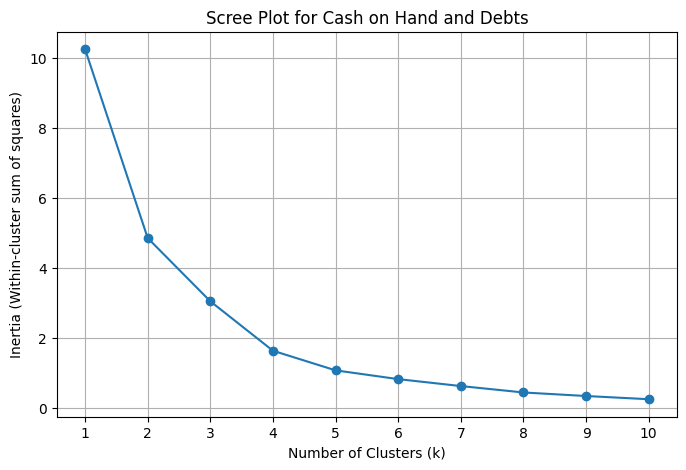

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Max-min normalize 'Cash on Hand' and 'Debts'
scaler = MinMaxScaler()
df[['Cash_normalized', 'Debts_normalized']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

# Create a scree plot for the normalized data
X_cash_debts = df[['Cash_normalized', 'Debts_normalized']]
inertia_cash_debts = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_cash_debts)
    inertia_cash_debts.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_cash_debts, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Scree Plot for Cash on Hand and Debts')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

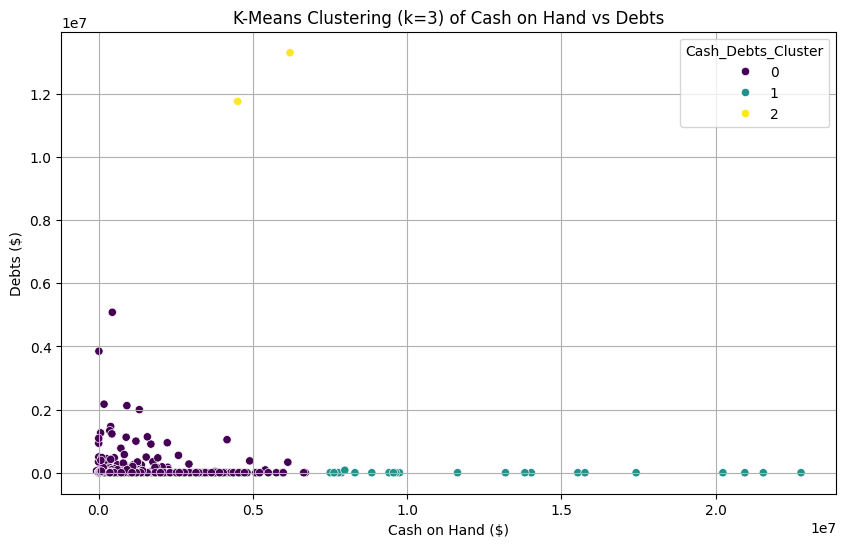

The two smallest clusters for Cash on Hand and Debts are: [2, 1]


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cash_Debts_Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
11,Alex Padilla,Democratic,California,Senate,11253771.0,3870947.0,7617654.0,5703.0,1
45,Bernie Sanders,Independent,Vermont,Senate,14074831.0,11331428.0,9751125.0,0.0,1
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,1
112,Cory Booker,Democratic,New Jersey,Senate,5794554.0,4010634.0,7671026.0,0.0,1
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0,2
239,Jim Jordan,Republican,Ohio,House,12417107.0,9675701.0,8855217.0,0.0,1
247,Joe Manchin,Democratic,West Virginia,Senate,7790164.0,835794.0,9414431.0,0.0,1
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,1
267,John Thune,Republican,South Dakota,Senate,6770674.0,2763217.0,17419927.0,0.0,1


In [16]:
# Perform K-Means clustering with k=3
kmeans_cash_debts = KMeans(n_clusters=3, random_state=100, n_init=10)
df['Cash_Debts_Cluster'] = kmeans_cash_debts.fit_predict(X_cash_debts)

# Create a scatter plot of Cash on Hand against Debts, hue by cluster membership
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cash_Debts_Cluster', palette='viridis', legend='full')
plt.xlabel('Cash on Hand ($)')
plt.ylabel('Debts ($)')
plt.title('K-Means Clustering (k=3) of Cash on Hand vs Debts')
plt.grid(True)
plt.show()

# Identify the two smallest clusters
cluster_counts_cash_debts = df['Cash_Debts_Cluster'].value_counts().sort_values()
smallest_clusters_cash_debts = cluster_counts_cash_debts.head(2).index.tolist()

print(f"The two smallest clusters for Cash on Hand and Debts are: {smallest_clusters_cash_debts}")

# Get the members of the smallest two clusters
members_smallest_clusters_cash_debts = df[df['Cash_Debts_Cluster'].isin(smallest_clusters_cash_debts)][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cash_Debts_Cluster']]

display(members_smallest_clusters_cash_debts)

Some members of the smallest two clusters consist of Tim Scott, Tom Cotton, Mitch McConnell, Marco Rubio, John Kennedy and more. In comparison to the previous model, we can see that the clustering overall in the two models look different. In the first model, we can see that there is an upwards trend of clustering that was taking place with it becoming more dispurse as you increase the amount that was raised. Whereas in the second model, there is no upward trend.

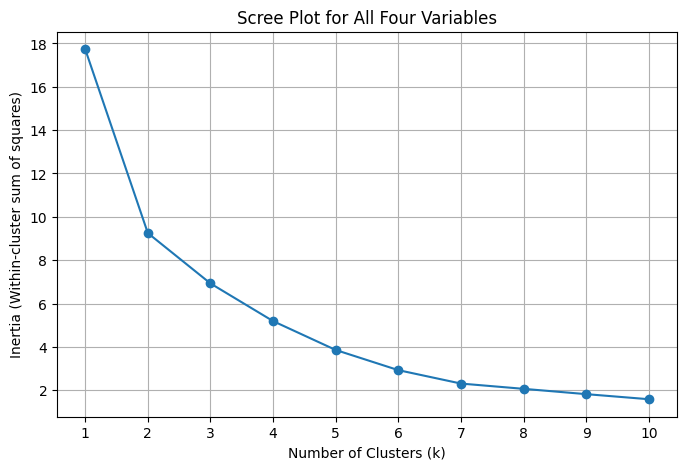

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the four numeric variables
X_all = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

# Max-min normalize the selected variables
scaler_all = MinMaxScaler()
X_all_normalized = scaler_all.fit_transform(X_all)

# Create a scree plot for the normalized data
inertia_all = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_all_normalized)
    inertia_all.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_all, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Scree Plot for All Four Variables')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [19]:
# Perform K-Means clustering with k=2 using all four variables
kmeans_all = KMeans(n_clusters=2, random_state=100, n_init=10)
df['All_Variables_Cluster'] = kmeans_all.fit_predict(X_all_normalized)

# Display the count of members in each cluster
display(df['All_Variables_Cluster'].value_counts())

# Examine the characteristics of each cluster, for example, by grouping and describing the data:
display(df.groupby('All_Variables_Cluster')[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe())

,count
All_Variables_Cluster,
0,514
1,23


Raised                                         \
                       count          mean           std        min   
All_Variables_Cluster                                                 
0                      514.0  2.433483e+06  2.532719e+06 -1386356.0   
1                       23.0  2.948903e+07  2.106584e+07  6695582.0   

                                                                        Spent  \
                              25%         50%          75%         max  count   
All_Variables_Cluster                                                           
0                        920754.0   1654624.5   3098516.25  18086343.0  514.0   
1                      13532786.0  24791538.0  37226270.50  86581469.0   23.0   

                                     ... Cash on Hand              Debts  \
                               mean  ...          75%         max  count   
All_Variables_Cluster                ...                                   
0                      1.930532e+06  ...    1794454.0   9558166.0  514.0   
1                      2.398697e+07  ...   15646321.0  22762985.0   23.0   

                                                                          \
                               mean           std  min  25%  50%     75%   
All_Variables_Cluster                                                      
0                      8.364666e+04  3.704155e+05  0.0  0.0  0.0  112.75   
1                      1.092606e+06  3.616785e+06  0.0  0.0  0.0    0.00   

                                   
                              max  
All_Variables_Cluster              
0                       5081387.0  
1                      13302000.0  

[2 rows x 32 columns]

The k-MC algorithm was useful in finding patterns by grouping politicians based on their campaign finance data in which we were able to identify outliers and high-activity campaigns. We can also use these findings to potentially suggest different campaign strategies when it comes to finances for these politicians.



**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?